In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics

In [2]:
df = pd.read_csv('CloudFactory_DataSet_Accuracy_Prediction.tsv', sep='\t')
df.fillna(0, axis=1, inplace = True)
df.head()

,timestamp,task_id,worker_id,keypress_keytypeint,mousemove_distance,mouseclick_button,work_duration,accuracy
0,1470267718900,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,4.0,0.0,0.0,23.884,1.0
1,1470267724803,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,0.0,0.0,23.884,1.0
2,1470267724823,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,0.0,0.0,23.884,1.0
3,1470267725117,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,0.0,0.0,23.884,1.0
4,1470267725276,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,0.0,0.0,23.884,1.0


In [3]:
df_avg = df[['task_id','work_duration','accuracy','mousemove_distance','mouseclick_button']]
df_avg = df_avg.groupby('task_id').mean()
df_avg.reset_index(level=0,inplace= True)

In [4]:
df_avg.head()

,task_id,work_duration,accuracy,mousemove_distance,mouseclick_button
0,57a280bc296d6d75f3d34350,16.770,1.0,2.817967,0.020408
1,57a280bc296d6d75f3d34351,32.118,1.0,1.357787,0.123077
2,57a28146e2013f2463dcd0b8,23.884,1.0,10.421885,0.035714
3,57a28146e2013f2463dcd0ba,12.470,1.0,0.000000,0.023256
4,57a28146e2013f2463dcd0bb,13.629,1.0,0.000000,0.000000


In [5]:
df[df['task_id']=='57a28146e2013f2463dcd0ba']['mousemove_distance'].mean()

0.0

In [6]:
df_avg['accuracy'].unique()

array([ 1.        ,  0.83333333,  0.83333333,  0.83333333,  0.        ,
        0.5       ,  0.83333333,  0.83333333,  0.83333333,  0.83333333,
        0.66666667,  0.83333333,  0.66666667,  0.83333333,  0.66666667,
        0.83333333,  0.83333333,  0.66666667,  0.83333333,  0.83333333,
        0.66666667,  0.83333333,  0.33333333,  0.66666667,  0.83333333,
        0.83333333,  0.66666667,  0.66666667,  0.66666667,  0.16666667,
        0.83333333,  0.66666667,  0.33333333,  0.33333333,  0.66666667,
        0.16666667,  0.16666667,  0.33333333,  0.66666667,  0.83333333,
        0.66666667,  0.33333333,  0.66666667,  0.66666667,  0.16666667,
        0.16666667,  0.66666667,  0.16666667,  0.33333333,  0.33333333,
        0.16666667,  0.33333333,  0.16666667,  0.33333333,  0.16666667,
        0.83333333,  0.83333333,  0.83333333,  0.66666667,  0.83333333,
        0.83333333,  0.16666667,  0.16666667,  0.33333333,  0.33333333,
        0.16666667,  0.16666667,  0.16666667,  0.16666667,  0.16

In [7]:
df_avg['accuracy'] = df_avg['accuracy'] * 6

In [8]:
df_avg['accuracy'] = df_avg['accuracy'].round()

In [9]:
df_avg['accuracy'].value_counts()

6.0    2626
5.0     923
3.0     476
0.0     475
4.0     227
1.0     218
2.0      55
Name: accuracy, dtype: int64

In [10]:
df_avg['accuracy'].nunique()

7

>> Now we have a matrix where accuracy has a values as integers. All the taks rows have ben grouped by task id

## Now we can run linear regression on this

In [11]:
x = pd.DataFrame(df_avg[['mousemove_distance','mouseclick_button','work_duration']])
y = pd.DataFrame(df_avg['accuracy'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.4, random_state = 101)

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
coef = pd.DataFrame(lm.coef_ , columns = x_test.columns)
coef

,mousemove_distance,mouseclick_button,work_duration
0,-0.002598,-2.533846,0.005528


In [14]:
predictions = lm.predict(x_test)

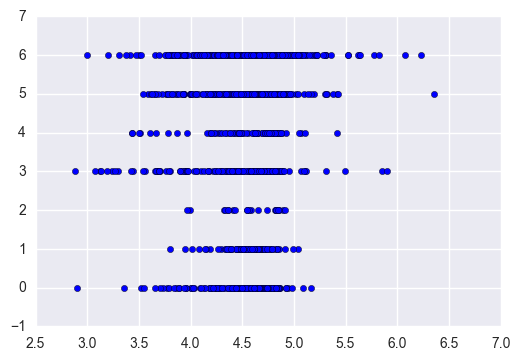

In [15]:
plt.scatter ( predictions, y_test )

In [16]:
y_test['accuracy'].shape

(2000,)

In [17]:
predictions.shape

(2000, 1)

In [18]:
m = pd.DataFrame(predictions)
m.head()

,0
0,4.722214
1,4.520221
2,4.876509
3,4.854210
4,3.759267


In [19]:
y_test['accuracy'].corr(m[0])

0.0040840931227624968

> let us convert all predictions into integers and then try to calculate correlation

In [20]:
m[0] = m[0].round()
m[0].value_counts()

5.0    1444
4.0     523
3.0      21
6.0      12
Name: 0, dtype: int64

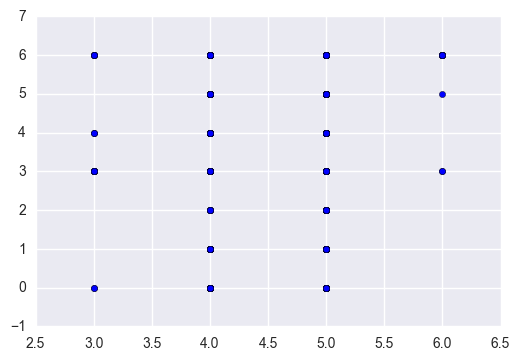

In [21]:
plt.scatter (m[0], y_test)

In [22]:
y_test['accuracy'].corr(m[0])

-0.0095305683693789056

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

## Now let us try by converting accuracy into 2 values

In [24]:
df_LR = df_avg
df_LR

,task_id,work_duration,accuracy,mousemove_distance,mouseclick_button
0,57a280bc296d6d75f3d34350,16.770,6.0,2.817967,0.020408
1,57a280bc296d6d75f3d34351,32.118,6.0,1.357787,0.123077
2,57a28146e2013f2463dcd0b8,23.884,6.0,10.421885,0.035714
3,57a28146e2013f2463dcd0ba,12.470,6.0,0.000000,0.023256
4,57a28146e2013f2463dcd0bb,13.629,6.0,0.000000,0.000000
5,57a28146e2013f2463dcd0bc,18.084,6.0,0.000000,0.000000
6,57a28146e2013f2463dcd0bd,16.293,6.0,0.000000,0.000000
7,57a28147e2013f2463dcd0bf,18.550,6.0,1.994116,0.035088
8,57a28147e2013f2463dcd0c0,17.066,6.0,0.139004,0.017241
9,57a28147e2013f2463dcd0c1,13.717,6.0,0.000000,0.000000


In [25]:
df_LR

,task_id,work_duration,accuracy,mousemove_distance,mouseclick_button
0,57a280bc296d6d75f3d34350,16.770,6.0,2.817967,0.020408
1,57a280bc296d6d75f3d34351,32.118,6.0,1.357787,0.123077
2,57a28146e2013f2463dcd0b8,23.884,6.0,10.421885,0.035714
3,57a28146e2013f2463dcd0ba,12.470,6.0,0.000000,0.023256
4,57a28146e2013f2463dcd0bb,13.629,6.0,0.000000,0.000000
5,57a28146e2013f2463dcd0bc,18.084,6.0,0.000000,0.000000
6,57a28146e2013f2463dcd0bd,16.293,6.0,0.000000,0.000000
7,57a28147e2013f2463dcd0bf,18.550,6.0,1.994116,0.035088
8,57a28147e2013f2463dcd0c0,17.066,6.0,0.139004,0.017241
9,57a28147e2013f2463dcd0c1,13.717,6.0,0.000000,0.000000


In [26]:
df_LR['accuracy'].replace(1,0,inplace= True)

In [27]:
 df_LR['accuracy'].replace(2,0,inplace= True)

In [28]:
df_LR['accuracy'].replace(3,0,inplace= True)

In [29]:
df_LR['accuracy'].replace(4,0,inplace= True)

In [30]:
df_LR['accuracy'].replace(5,0,inplace= True)

In [31]:
df_LR['accuracy'].replace(6,1,inplace= True)

In [32]:
df_LR['accuracy'].value_counts()

1.0    2626
0.0    2374
Name: accuracy, dtype: int64

In [33]:
X = pd.DataFrame(df_LR[['mousemove_distance','mouseclick_button','work_duration']])
Y = pd.DataFrame(df_avg['accuracy'])

In [34]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.5, random_state=101)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression()

In [63]:
logmodel.fit(x_train,y_train)

C:\Users\Chinmay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
predictions = logmodel.predict(x_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print (classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.59      0.28      0.38      1199
        1.0       0.55      0.82      0.66      1301

avg / total       0.57      0.56      0.53      2500



In [67]:
predictions1 = logmodel.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, predictions1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [68]:
roc_auc

{0: 0.40350561158126264, 1: 0.59649438841873736}

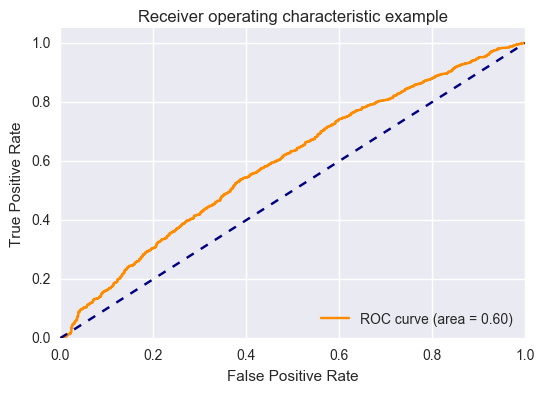

In [69]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [42]:
df.head()

,timestamp,task_id,worker_id,keypress_keytypeint,mousemove_distance,mouseclick_button,work_duration,accuracy
0,1470267718900,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,4.0,0.0,0.0,23.884,1.0
1,1470267724803,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,0.0,0.0,23.884,1.0
2,1470267724823,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,6.0,0.0,0.0,23.884,1.0
3,1470267725117,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,0.0,0.0,23.884,1.0
4,1470267725276,57a28146e2013f2463dcd0b8,512dbf09c32206698e000518,12.0,0.0,0.0,23.884,1.0


In [43]:
df_worker = df[['task_id','worker_id','work_duration','accuracy','mousemove_distance','mouseclick_button']]

In [44]:
df_worker = df_worker.groupby(['worker_id','task_id']).mean()

In [45]:
df_worker

work_duration  accuracy  \
worker_id                task_id                                             
501767d1cb022453170004dc 57a2997ee2013f0c5a5d9f33         88.318  0.833333   
                         57a2997ee2013f0c5a5d9f34         34.392  1.000000   
                         57a2997ee2013f0c5a5d9f35         18.640  1.000000   
                         57a2997ee2013f0c5a5d9f36         15.841  0.833333   
                         57a2997ee2013f0c5a5d9f37         15.844  1.000000   
                         57a2997ee2013f0c5a5d9f38          9.907  0.833333   
                         57a2997ee2013f0c5a5d9f39         18.598  0.833333   
                         57a2997ee2013f0c5a5d9f3a         75.675  1.000000   
                         57a2997ee2013f0c5a5d9f3b         17.629  0.833333   
                         57a2997ee2013f0c5a5d9f3c        114.393  0.833333   
                         57a2997ee2013f0c5a5d9f3d         17.029  1.000000   
                         57a2997ee2013f0c5a5d9f3e        111.812  1.000000   
                         57a29b3de2013f6e4adcca36         28.240  0.500000   
                         57a29b3de2013f6e4adcca37         26.275  0.500000   
                         57a29b3de2013f6e4adcca38         50.592  1.000000   
                         57a29b3de2013f6e4adcca39         18.015  0.666667   
                         57a29b3de2013f6e4adcca3a         19.247  1.000000   
                         57a29b3de2013f6e4adcca3b         27.256  0.833333   
                         57a29b3de2013f6e4adcca3c         15.187  0.166667   
                         57a29b3de2013f6e4adcca3d         15.498  1.000000   
                         57a29b3de2013f6e4adcca3e          9.876  0.500000   
                         57a29b3de2013f6e4adcca3f        130.237  0.666667   
                         57a29b3de2013f6e4adcca40         31.755  1.000000   
                         57a29b3de2013f6e4adcca41         18.046  1.000000   
                         57a29d44e2013f0c5a5da1dc         38.389  1.000000   
                         57a29d44e2013f0c5a5da1dd          5.014  0.000000   
                         57a29d44e2013f0c5a5da1de         33.238  0.833333   
                         57a29d44e2013f0c5a5da1df         20.732  1.000000   
                         57a29d44e2013f0c5a5da1e0         18.239  0.833333   
                         57a29d44e2013f0c5a5da1e1         17.720  1.000000   
...                                                          ...       ...   
56ea2b6a63428b4ec3000063 57a29a16296d6d43c8d34716         85.600  1.000000   
                         57a29a16296d6d43c8d34717        144.699  1.000000   
                         57a29a16296d6d43c8d34719         48.846  1.000000   
                         57a2c989e2013f7ece94f31d        198.392  0.500000   
                         57a2c989e2013f7ece94f31e         41.769  0.500000   
                         57a2ca57e2013f32e8dccfa9         21.259  1.000000   
                         57a2ed36e2013f64d45da932         92.705  1.000000   
                         57a30262e2013f76f394f5cd         41.953  1.000000   
                         57a3f708e2013f6195dccd17        184.744  0.500000   
                         57a3f708e2013f6195dccd18         28.273  1.000000   
                         57a3f708e2013f6195dccd19         15.462  1.000000   
                         57a3f708e2013f6195dccd1a         49.827  0.500000   
570b4757cb63b02e36000457 57a2a35a296d6d22f946f2ed        216.470  1.000000   
                         57a2b0ac296d6d54bec9b01a        102.864  0.000000   
                         57a2b67fe2013f26945da32b         72.253  1.000000   
                         57a2c5e6e2013f43f95d9e96         67.257  0.000000   
                         57a2c5e6e2013f43f95d9e97        103.240  0.500000   
                         57a2c6a9296d6d194e46e8c6         63.966  0.000000   
                         57a3f469296d6d3535d34042         46.409  0.66666

In [46]:
df_worker.reset_index(level=0,inplace = True)

In [47]:
df_worker.reset_index(level=0,inplace = True)

In [48]:
df_worker

,task_id,worker_id,work_duration,accuracy,mousemove_distance,mouseclick_button
0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc,88.318,0.833333,19.722592,0.068966
1,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc,34.392,1.000000,7.173393,0.376812
2,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc,18.640,1.000000,22.958495,0.061224
3,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc,15.841,0.833333,8.415718,0.093023
4,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc,15.844,1.000000,2.868044,0.155556
5,57a2997ee2013f0c5a5d9f38,501767d1cb022453170004dc,9.907,0.833333,6.811904,0.108108
6,57a2997ee2013f0c5a5d9f39,501767d1cb022453170004dc,18.598,0.833333,5.422883,0.160000
7,57a2997ee2013f0c5a5d9f3a,501767d1cb022453170004dc,75.675,1.000000,13.941594,0.047619
8,57a2997ee2013f0c5a5d9f3b,501767d1cb022453170004dc,17.629,0.833333,7.259340,0.142857
9,57a2997ee2013f0c5a5d9f3c,501767d1cb022453170004dc,114.393,0.833333,37.741768,0.417391


workers = df_worker['worker_id'].unique()
temp_list=[]
worker_mat = pd.DataFrame(columns = ['Worker Number','Worker_id','No of tasks','Correlation'])
for i,j in enumerate (workers):
    dataframe = df_worker[df_worker['worker_id']==str(j)]
    count = dataframe.count(axis=0)[0]
    core = dataframe['work_duration'].corr(dataframe['accuracy'])
    temp = pd.DataFrame([[i,j,count,core]], columns=['Worker Number','Worker_id','No of tasks','Correlation'])
    temp_list.append(temp)
worker_mat = worker_mat.append(temp_list)

In [49]:
#worker_mat

### Do not run the following codes .. already done once and saved as a matrix

In [50]:
#worker_mat.drop(['level_0','index'],axis=1,inplace = True)

In [51]:
#worker_mat.to_csv('worker_matrix.csv')

In [52]:
df_worker.head()

,task_id,worker_id,work_duration,accuracy,mousemove_distance,mouseclick_button
0,57a2997ee2013f0c5a5d9f33,501767d1cb022453170004dc,88.318,0.833333,19.722592,0.068966
1,57a2997ee2013f0c5a5d9f34,501767d1cb022453170004dc,34.392,1.000000,7.173393,0.376812
2,57a2997ee2013f0c5a5d9f35,501767d1cb022453170004dc,18.640,1.000000,22.958495,0.061224
3,57a2997ee2013f0c5a5d9f36,501767d1cb022453170004dc,15.841,0.833333,8.415718,0.093023
4,57a2997ee2013f0c5a5d9f37,501767d1cb022453170004dc,15.844,1.000000,2.868044,0.155556


In [53]:
df_worker.to_csv('worker.csv')